<a href="https://colab.research.google.com/github/minhong1126/data_analysis/blob/main/lecture3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

# Cars93 data
In this lab, we would like to explore data about 93 number of vehicles.


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')
df

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,None,Front,4,1.8,140.0,6300.0,2890.0,Yes,13.2,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,6,3.2,200.0,5500.0,2335.0,Yes,18.0,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,6,2.8,172.0,5500.0,2280.0,Yes,16.9,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,6,NaN,172.0,5500.0,2535.0,NaN,21.1,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,NaN,30.0,NaN,22.0,30.0,NaN,Rear,4,3.5,208.0,5700.0,2545.0,Yes,21.1,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17.0,21.0,None,Front,5,2.5,109.0,4500.0,2915.0,Yes,21.1,7.0,187.0,115.0,72.0,38.0,34.0,NaN,3960.0,NaN,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,17.6,20.0,22.4,21.0,30.0,None,Front,4,2.0,134.0,5800.0,2685.0,Yes,18.5,5.0,180.0,103.0,67.0,35.0,31.5,14.0,2985.0,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18.0,25.0,None,Front,6,2.8,178.0,5800.0,2385.0,Yes,18.5,4.0,159.0,97.0,66.0,36.0,26.0,15.0,2810.0,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,21.8,22.7,23.5,21.0,28.0,Driver only,Rear,NaN,2.3,114.0,5400.0,2215.0,Yes,15.8,5.0,190.0,104.0,67.0,37.0,29.5,14.0,2985.0,non-USA,Volvo 240


# Descritive Statistics
Describe statistics of data using `describe()` method for numeric data (default).



In [3]:
df.describe()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
count,86.000000,91.000000,88.000000,84.000000,91.000000,91.000000,86.000000,90.000000,87.000000,85.000000,91.000000,89.000000,92.000000,87.000000,88.000000,89.000000,74.000000,86.000000
mean,17.118605,19.616484,21.459091,22.404762,29.065934,2.658242,144.000000,5276.666667,2355.000000,16.683529,5.076923,182.865169,103.956522,69.448276,38.954545,27.853933,13.986486,3104.593023
std,8.828290,9.724280,10.696563,5.841520,5.370293,1.045845,53.455204,605.554811,486.916616,3.375748,1.045953,14.792651,6.856317,3.778023,3.304157,3.018129,3.120824,600.129993
min,6.700000,7.400000,7.900000,15.000000,20.000000,1.000000,55.000000,3800.000000,1320.000000,9.200000,2.000000,141.000000,90.000000,60.000000,32.000000,19.000000,6.000000,1695.000000
25%,10.825000,12.350000,14.575000,18.000000,26.000000,1.800000,100.750000,4800.000000,2017.500000,14.500000,4.000000,174.000000,98.000000,67.000000,36.000000,26.000000,12.000000,2647.500000
50%,14.600000,17.700000,19.150000,21.000000,28.000000,2.300000,140.000000,5200.000000,2360.000000,16.500000,5.000000,181.000000,103.000000,69.000000,39.000000,27.500000,14.000000,3085.000000
75%,20.250000,23.500000,24.825000,25.000000,31.000000,3.250000,170.000000,5787.500000,2565.000000,19.000000,6.000000,192.000000,110.000000,72.000000,42.000000,30.000000,16.000000,3567.500000
max,45.400000,61.900000,80.000000,46.000000,50.000000,5.700000,300.000000,6500.000000,3755.000000,27.000000,8.000000,219.000000,119.000000,78.000000,45.000000,36.000000,22.000000,4105.000000


**[TODO]** For categorical data, specify `include` parametor as `'object'`. 
(hint, refer [`pd.describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html))

In [4]:
df.describe(include = 'object')

,Manufacturer,Model,Type,AirBags,DriveTrain,Cylinders,Man.trans.avail,Origin,Make
count,89,92,90,87,86,88,88,88,90
unique,31,92,6,3,3,6,2,2,90
top,Ford,Mustang,Midsize,Driver only,Front,4,Yes,USA,Toyota Previa
freq,8,1,22,39,61,45,57,46,1


## Measuring skewness
**[TODO]** Measure skewness for all numeric attribute and sort by value.

In [5]:
skewness = df.skew()
skewness.sort_values()

Weight               -0.269695
RPM                  -0.237511
Turn.circle          -0.127313
Length               -0.036669
Rear.seat.room        0.054352
Passengers            0.081776
Fuel.tank.capacity    0.085445
Wheelbase             0.108599
Luggage.room          0.149069
Width                 0.288760
Rev.per.mile          0.354385
EngineSize            0.881670
Horsepower            0.944585
Min.Price             1.227271
MPG.highway           1.238671
Price                 1.510432
MPG.city              1.662674
Max.Price             2.248420
dtype: float64

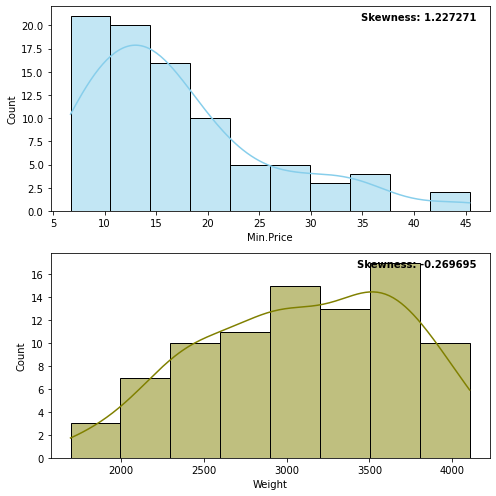

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

f, axes = plt.subplots(2, 1, figsize=(7, 7))

# Get attribute with lowest skewness value
highSkewAttribute = df[skewness.index[0]]

# Plot distplot
ax = axes[0]
sns.histplot(data=df, x=highSkewAttribute, color="skyblue", ax=ax, kde=True)

# Add legend 
ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % highSkewAttribute.skew(),\
    fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right')


# Get attribute with highest skewness value
lowSkewAttribute = df[skewness.index[-1]]
ax = axes[1]

# Plot distplot
sns.histplot(data=df, x=lowSkewAttribute, color="olive", ax=ax, kde=True)

# Add legend 
ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % lowSkewAttribute.skew(),\
    fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right')

plt.tight_layout()

# Correlation
**[TODO]** Select `Price`, `Horsepower`, `MPG.city` attribte from dataframe, and compute `pearson` correlation value.

In [7]:
## Complte the code
selectedDataFrame = df[['Price', 'Horsepower', 'MPG.city']]
selectedDataFrame.corr(method = 'pearson')

,Price,Horsepower,MPG.city
Price,1.000000,0.794607,-0.596479
Horsepower,0.794607,1.000000,-0.714274
MPG.city,-0.596479,-0.714274,1.000000


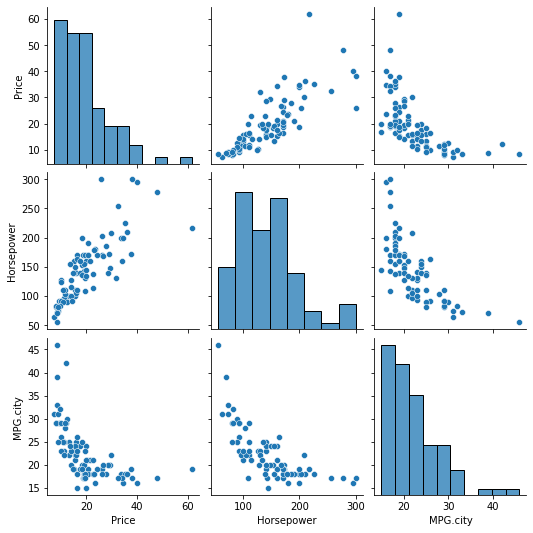

In [8]:
g = sns.pairplot(selectedDataFrame)
plt.show()

# Statistical Hypothesis Test
We would like the test that is there a significant `price` difference between `small` and `midsize` type car.

**[TODO]** Test our hypothesis with proper statistical test with siginificance level as `0.05`.

**[BEWARE]** If there is missing value (`nan`) in `pd.Series`, test will not be working properly. 

In [11]:
from scipy.stats import ttest_ind

siginificantLevel = 0.05
smallCarPrice = df[df['Type'] == 'Small'].dropna(subset = ['Price'])
midsizeCarPrice = df[df['Type'] == 'Midsize'].dropna(subset = ['Price'])

stats, p = ttest_ind(smallCarPrice['Price'], midsizeCarPrice['Price'])
print(f'P-value {p}')

if p < siginificantLevel:
  print("The price of the two types shows a significant difference.")
else:
  print("The price of the two types shows no significant difference.")

P-value 4.776167204207221e-07
The price of the two types shows a significant difference.
